In [44]:
# !pip install seaborn --upgrade
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [46]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [49]:
# datetiem의 타입 지정
df_train["datetime"] = pd.to_datetime(df_train["datetime"])
df_test["datetime"] = pd.to_datetime(df_test["datetime"])

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [51]:
df_train.apply(lambda x : x.unique())

datetime      [2011-01-01 00:00:00, 2011-01-01 01:00:00, 201...
season                                             [1, 2, 3, 4]
holiday                                                  [0, 1]
workingday                                               [0, 1]
weather                                            [1, 2, 3, 4]
temp          [9.84, 9.02, 8.2, 13.12, 15.58, 14.76, 17.22, ...
atemp         [14.395, 13.635, 12.88, 17.425, 19.695, 16.665...
humidity      [81, 80, 75, 86, 76, 77, 72, 82, 88, 87, 94, 1...
windspeed     [0.0, 6.0032, 16.9979, 19.0012, 19.9995, 12.99...
casual        [3, 8, 5, 0, 2, 1, 12, 26, 29, 47, 35, 40, 41,...
registered    [13, 32, 27, 10, 1, 0, 2, 7, 6, 24, 30, 55, 47...
count         [16, 40, 32, 13, 1, 2, 3, 8, 14, 36, 56, 84, 9...
dtype: object

In [52]:
# datetime은 일, 월 , 년, 시간으로 나눌 것
# season, holiday, workingday, weather -> onehotencoding
# 나머지는 numeric한 데이터임 
# count -> target

<Axes: >

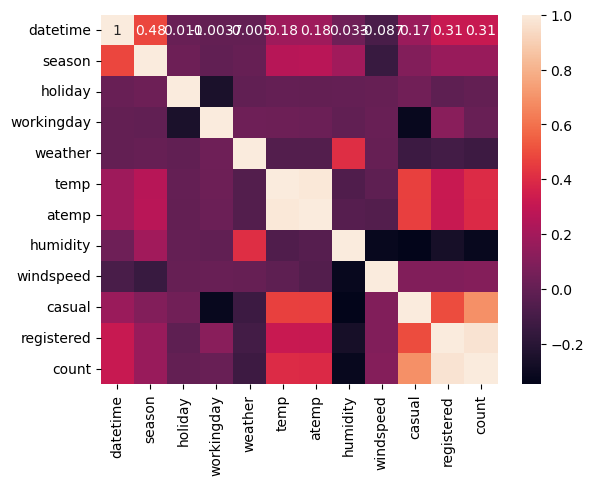

In [53]:
corr = df_train.corr()
sns.heatmap(corr, annot=True)

In [54]:
# temp와 atemp 간 상관계수가 높은 것으로 확인됨 
corr["count"].abs().sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
humidity      0.317371
datetime      0.310187
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

In [55]:
#registered가 너무 높은 상관관계를 보이므로, 다중공선성 의심 -> 삭제 필요
# df_train.drop(["registered", "casual"], axis=1, inplace=True)
# df_test.drop(["registered", "casual"], axis=1, inplace=True)

<Axes: xlabel='season', ylabel='count'>

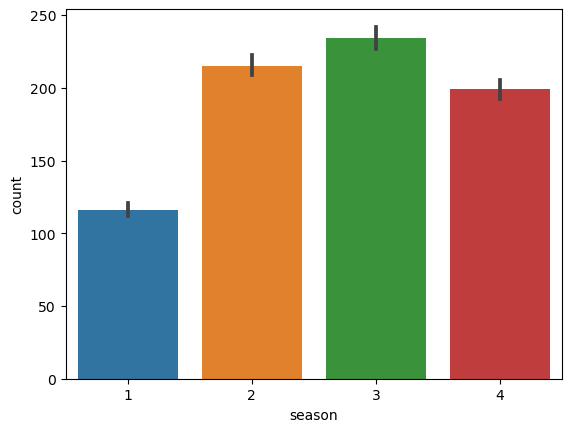

In [56]:
sns.barplot(x="season", y="count", data=df_train)

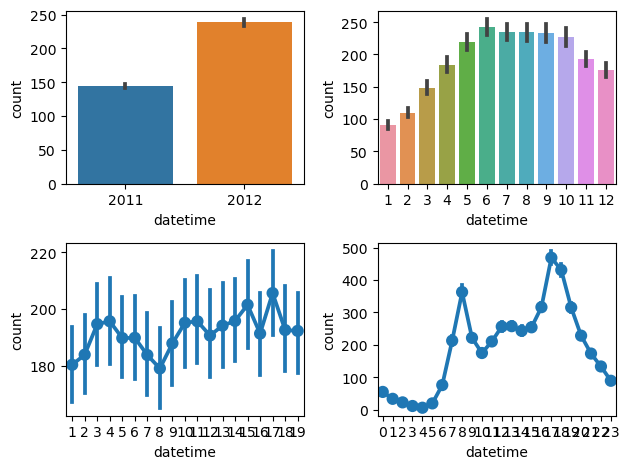

In [57]:
year = df_train["datetime"].dt.year
month = df_train["datetime"].dt.month
day = df_train["datetime"].dt.day
hour = df_train["datetime"].dt.hour

plt.figure()
plt.subplot(2,2,1)
sns.barplot(x=year, y='count', data=df_train)
plt.subplot(2,2,2)
sns.barplot(x=month, y='count', data=df_train)
plt.subplot(2,2,3)
sns.pointplot(x=day, y='count', data=df_train)
plt.subplot(2,2,4)
sns.pointplot(x=hour, y='count', data=df_train)
plt.tight_layout()

- 2012년도에 더 많은 추세
- 월별로 특징 뚜렷 (겨울에 적어짐)
- 일별로도 있긴하지만 확실하진 않음
- 시간대별로 차이가 확실히 존재(오전과 저녁시간에 확 오름)

<Axes: xlabel='datetime', ylabel='count'>

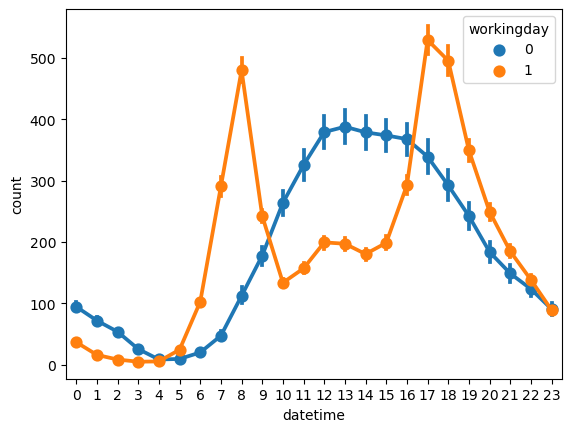

In [58]:
sns.pointplot(x=hour, y='count', hue="workingday", data=df_train)
# df_train.groupby("workingday").size()

<Figure size 640x480 with 0 Axes>

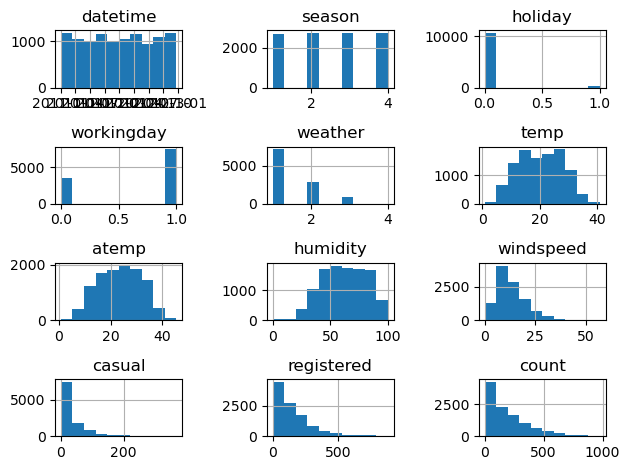

In [59]:
plt.figure()
df_train.hist()
plt.tight_layout()

C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='windspeed', ylabel='Count'>

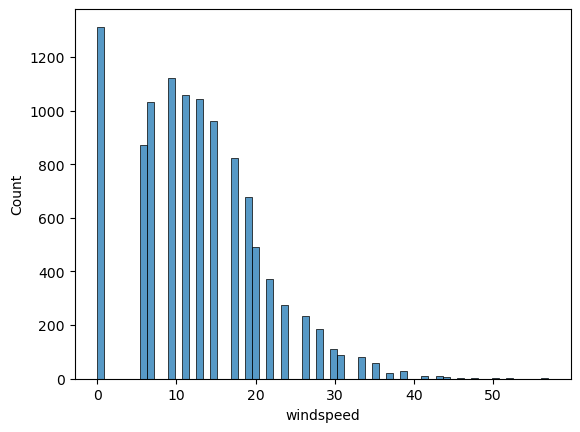

In [62]:
sns.histplot(df_train["windspeed"])

## 인코딩

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [66]:
df_train["year"] = year
df_train["month"] = month
df_train["day"] = day
df_train["hour"] = hour
df_train.drop(["datetime"], axis=1, inplace=True)

df_test["year"] = year
df_test["month"] = month
df_test["day"] = day
df_test["hour"] = hour
df_test.drop(["datetime"], axis=1, inplace=True)

In [67]:
df_train.drop(["registered", "casual"], axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int32  
 10  month       10886 non-null  int32  
 11  day         10886 non-null  int32  
 12  hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(6)
memory usage: 935.6 KB


In [68]:
from sklearn.model_selection import train_test_split
x = df_train.drop(["count"], axis=1)
y = df_train[["count"]]

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_val))

8708 2178


In [70]:
# datetime은 일, 월 , 년, 시간으로 나눌 것
# season, holiday, workingday, weather -> onehotencoding
# 나머지는 numeric한 데이터임 
# count -> target
from sklearn.preprocessing import OneHotEncoder, StandardScaler

onehot_cols = ["holiday", "workingday", "season"]

onehot = OneHotEncoder(sparse_output=False)
trained = onehot.fit_transform(X_train[onehot_cols])
valided = onehot.transform(X_val[onehot_cols])
tested = onehot.transform(df_test[onehot_cols])

In [72]:
trans_cols = onehot.get_feature_names_out()
trans_train = pd.DataFrame(trained, columns=trans_cols, index=X_train.index)
trans_valid = pd.DataFrame(valided, columns=trans_cols, index=X_val.index)
trans_test = pd.DataFrame(tested, columns=trans_cols, index=df_test.index)

In [75]:
X_train = pd.concat([X_train.drop(onehot_cols, axis=1), trans_train], axis=1)
X_val = pd.concat([X_val.drop(onehot_cols, axis=1), trans_valid], axis=1)
df_test = pd.concat([df_test.drop(onehot_cols, axis=1), trans_test], axis=1)

In [76]:
X_train.head()

,weather,temp,atemp,humidity,windspeed,year,month,day,hour,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,season_3,season_4
2815,1,27.88,31.820,83,6.0032,2011,7,6,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8695,1,36.90,40.910,39,19.9995,2012,8,4,16,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8406,1,32.80,35.605,41,16.9979,2012,7,11,15,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1543,2,14.76,18.180,93,7.0015,2011,4,10,4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4952,1,13.12,15.150,45,16.9979,2011,11,19,10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [78]:
# 스케일링
sc_cols = ["temp", "atemp", "humidity", "windspeed"]
scaler = StandardScaler()
X_train[sc_cols] = scaler.fit_transform(X_train[sc_cols])
X_val[sc_cols] = scaler.fit_transform(X_val[sc_cols])
df_test[sc_cols] = scaler.fit_transform(df_test[sc_cols])

In [79]:
X_train

,weather,temp,atemp,humidity,windspeed,year,month,day,hour,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,season_3,season_4
2815,1,0.977262,0.960505,1.098553,-0.828356,2011,7,6,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8695,1,2.135457,2.034991,-1.182694,0.878555,2012,8,4,16,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8406,1,1.609005,1.407912,-1.079001,0.512496,2012,7,11,15,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1543,2,-0.707385,-0.651814,1.617019,-0.706609,2011,4,10,4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4952,1,-0.917966,-1.009976,-0.871615,0.512496,2011,11,19,10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,-1.760290,-1.815545,-0.767922,-0.218804,2012,1,14,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5191,1,-1.128547,-1.278302,-0.042070,0.756807,2011,12,10,9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5390,1,-1.128547,-1.189057,-0.716075,0.512496,2011,12,18,16,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
860,1,-0.602095,-0.472733,-2.323317,2.708030,2011,2,19,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## 학습

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [85]:
gb = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

gb.fit(X_train, y_train)

C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [87]:
y_pred = gb.predict(X_val)

from sklearn.metrics import mean_squared_error, r2_score
print("mean_squared_error : ", mean_squared_error(y_pred, y_val))
print("r2_score : ", r2_score(y_pred, y_val))
print("score : ", gb.score(X_val, y_val))

mean_squared_error :  4836.684235277453
r2_score :  0.7918079431644477
score :  0.8534646095276952


In [89]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [92]:
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}
cv = RandomizedSearchCV(
    gb,
    param_distributions=params,
    cv=3,
    n_iter=50,
    random_state=42,
    refit=True
)
cv.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [95]:
print(cv.best_params_)
print(cv.best_estimator_)
print(cv.best_score_)

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 5, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=5, min_samples_leaf=20, n_estimators=300,
                          random_state=42)
0.938615177403603


In [96]:
y_pred = cv.best_estimator_.predict(X_val)
print("mean_squared_error : ", mean_squared_error(y_pred, y_val))
print("r2_score : ", r2_score(y_pred, y_val))
print("score : ", cv.score(X_val, y_val))

mean_squared_error :  1787.4965107041312
r2_score :  0.9407092195659235
score :  0.9458448212820147


In [97]:
sub = pd.read_csv("sampleSubmission.csv")
sub.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [104]:
pred_test = cv.predict(df_test)
result = pd.DataFrame(pred_test, columns=["count"], index=sub.index)
result.loc[result["count"] < 0, 'count'] = 0
result

,count
0,2.345649
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
6488,119.120652
6489,133.712205
6490,212.796034
6491,393.983560


In [105]:
sub["count"] = result
sub

,datetime,count
0,2011-01-20 00:00:00,2.345649
1,2011-01-20 01:00:00,0.000000
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,0.000000
4,2011-01-20 04:00:00,0.000000
...,...,...
6488,2012-12-31 19:00:00,119.120652
6489,2012-12-31 20:00:00,133.712205
6490,2012-12-31 21:00:00,212.796034
6491,2012-12-31 22:00:00,393.983560


In [106]:
sub.to_csv("sampleSubmission.csv")